In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('data.csv')
df.head()

,label,left_x1,left_y1,left_z1,left_x2,left_y2,left_z2,left_x3,left_y3,left_z3,...,right_z18,right_x19,right_y19,right_z19,right_x20,right_y20,right_z20,right_x21,right_y21,right_z21
0,One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,One,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print(len(df))

20910


In [4]:
df = df.dropna(thresh=2).fillna(-2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19903 entries, 7 to 20909
Columns: 127 entries, label to right_z21
dtypes: float64(126), object(1)
memory usage: 19.4+ MB


In [6]:
df.describe()

,left_x1,left_y1,left_z1,left_x2,left_y2,left_z2,left_x3,left_y3,left_z3,left_x4,...,right_z18,right_x19,right_y19,right_z19,right_x20,right_y20,right_z20,right_x21,right_y21,right_z21
count,19903.000000,19903.000000,1.990300e+04,19903.000000,19903.000000,19903.000000,19903.000000,19903.000000,19903.000000,19903.000000,...,19903.000000,19903.000000,19903.000000,19903.000000,19903.000000,19903.000000,19903.000000,19903.000000,19903.000000,19903.000000
mean,0.643266,0.562947,-8.591659e-02,0.610242,0.535696,-0.096371,0.585598,0.490524,-0.103523,0.579154,...,-1.868251,-1.832043,-1.827760,-1.868607,-1.831107,-1.829555,-1.868605,-1.830344,-1.830994,-1.868587
std,0.562506,0.554427,4.055367e-01,0.555440,0.548514,0.403512,0.550506,0.538781,0.402184,0.549277,...,0.491796,0.627233,0.644009,0.490483,0.630757,0.637206,0.490493,0.633623,0.631751,0.490563
min,-2.000000,-2.000000,-2.000000e+00,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,0.723418,0.593300,-6.513006e-08,0.689924,0.562237,-0.018538,0.662098,0.518148,-0.028909,0.658475,...,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
50%,0.757549,0.677411,1.092590e-07,0.722682,0.650667,-0.013527,0.697042,0.603279,-0.021592,0.688825,...,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
75%,0.791291,0.754420,3.099556e-07,0.754001,0.726288,-0.006755,0.730677,0.678592,-0.010847,0.724247,...,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
max,0.967150,1.044147,1.507549e-06,0.968866,1.016640,0.107877,0.989638,0.975636,0.141366,0.994627,...,0.070965,0.724975,1.075345,0.085139,0.739975,1.071280,0.084095,0.749740,1.071071,0.082480


In [7]:
features = df.drop(columns = ['label'])
label = df['label']

In [8]:
label_encoded = pd.get_dummies(label)
label_encoded

,A,B,C,Father,Hello,One,Thanks,eight,five,four,nine,seven,six,three,two,zero
7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20905,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
20906,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
20907,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
20908,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [9]:
features.values.shape

(19903, 126)

In [10]:
X_dev, X_test, y_dev, y_test = train_test_split(features.values, label, stratify=label, test_size=.1)

In [11]:
print(len(X_dev), len(y_dev))
print(len(X_test), len(y_test))

17912 17912
1991 1991


In [12]:
X_train, X_hyp, y_train, y_hyp = train_test_split(X_dev, y_dev, stratify=y_dev, test_size=.1)

In [13]:
print('Train set: ', len(X_train), len(y_train))
print('Development set: ', len(X_hyp), len(y_hyp))
print('Test set: ', len(X_test), len(y_test))

Train set:  16120 16120
Development set:  1792 1792
Test set:  1991 1991


In [14]:
knn = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs = -1)

In [15]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

In [16]:
from sklearn.metrics import confusion_matrix
y_true = y_hyp
y_pred = knn.predict(X_hyp)
y_proba = knn.predict_proba(X_hyp)
# print(y_proba)
print(confusion_matrix(y_true, y_pred))

[[ 91   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 118   0   0   1   0   0   0   2   5   0   0   0   0   0   0]
 [  0   1 130   0   0   0   0   0   1   0   0   0   0   0   0   0]
 [  0   0   0  25   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1  84   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 149   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 119   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 153   0   0   0   0   0   1   0   0]
 [  0   2   0   0   0   0   0   0 121   1   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   3 116   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 154   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  93   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 105   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  90   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 124 

<AxesSubplot:>

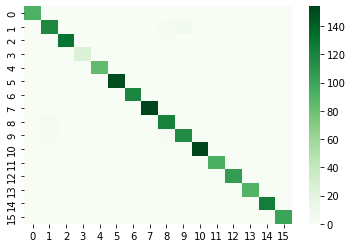

In [17]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_true, y_pred), cmap='Greens')

[[102   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 132   0   1   1   0   0   0   1   5   0   0   0   0   0   0]
 [  0   0 147   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  27   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   1  92   0   0   0   0   0   0   0   0   0   1   0]
 [  0   0   0   0   0 166   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 132   0   0   0   0   0   1   0   0   0]
 [  0   1   0   0   0   0   0 169   0   0   0   0   0   0   0   0]
 [  0   1   0   0   1   0   0   0 134   2   0   0   0   0   0   0]
 [  0   2   0   0   0   0   0   0   0 132   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 172   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 103   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   3   0   0 113   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 100   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 137 

<AxesSubplot:>

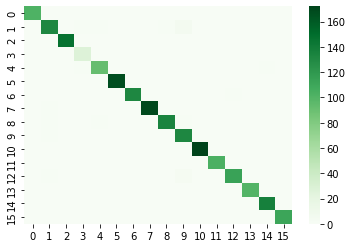

In [18]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_hyp)
# print(y_proba)
print(confusion_matrix(y_true, y_pred))
sns.heatmap(confusion_matrix(y_true, y_pred), cmap='Greens')

In [19]:
knn.predict([X_test[0]])[0]

'Hello'

In [20]:
def testModel(model):
    import cv2
    import mediapipe as mp

    mp_holistic = mp.solutions.holistic
    mp_drawings = mp.solutions.drawing_utils
    mp_drawings_styles = mp.solutions.drawing_styles

    cap = cv2.VideoCapture(0)

    with mp_holistic.Holistic(
        min_detection_confidence = 0.5,
        min_tracking_confidence = 0.5) as holistic:

        left, right = None, None
        while cap.isOpened():
            success, image = cap.read()
            if not success:
                print("Ignoring empty frame")
                continue

            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False

            results = holistic.process(image)

            right = results.right_hand_landmarks
            left = results.left_hand_landmarks
            right_hand_marks = [-2]*63
            left_hand_marks = [-2]*63

            if right is not None:
                ind = 0
                for l in right.landmark:
                    right_hand_marks[ind], right_hand_marks[ind + 1], right_hand_marks[ind + 2] = l.x, l.y, l.z
                    ind += 3
            if left is not None:
                ind = 0
                for l in left.landmark:
                    left_hand_marks[ind], left_hand_marks[ind + 1], left_hand_marks[ind + 2] = l.x, l.y, l.z
                    ind += 3
            
            x = left_hand_marks + right_hand_marks
            isEmpty = all(i == -2 for i in x)
            if isEmpty:
                y = 'No Sign Detected'
            else:
                y = model.predict([x])[0]
            
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image.flags.writeable = True

            mp_drawings.draw_landmarks( image, 
                                            results.right_hand_landmarks,
                                            mp_holistic.HAND_CONNECTIONS,
                                            mp_drawings.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                                            mp_drawings.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                                    )
            mp_drawings.draw_landmarks( image, 
                                            results.left_hand_landmarks,
                                            mp_holistic.HAND_CONNECTIONS,
                                            mp_drawings.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                                            mp_drawings.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                                    )
            image = cv2.flip(image, 1)
            cv2.putText(image, y, (100, 100), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 255, 255), 2, cv2.LINE_4)
            cv2.imshow('Detection', image)
            if cv2.waitKey(5) & 0xFF == 27:
                break
    
    cap.release()
    cv2.destroyAllWindows()

In [21]:
testModel(knn)

In [54]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

In [55]:
y_train = [[i] for i in y_train.values]

AttributeError: 'list' object has no attribute 'values'

In [56]:
y_train_encoded = onehotencoder.fit_transform(y_train)
y_train_encoded.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [58]:
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train_encoded.toarray())

DecisionTreeClassifier()

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
y_true = y_hyp
y_pred = dec_tree.predict(X_hyp)
y_proba = dec_tree.predict_proba(X_hyp)
print(y_pred)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
